# Assignment 1 Part B

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
#Set Variables
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 10
seed = 10
decay = 10^-3

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)


In [3]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [4]:
# experiment with small datasets
trainX,testX,trainY,testY=train_test_split(X_data, Y_data,
train_size=0.7,
test_size=0.3)

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

In [5]:
# create a network
ffn_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='linear')
])

ffn_model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [6]:
# learn the network
histories['ffn'] =fnn_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 2)


NameError: name 'fnn_model' is not defined

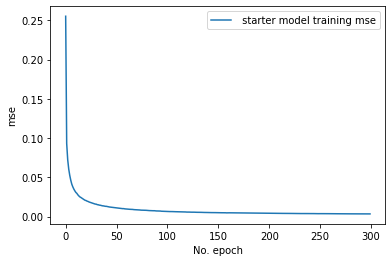

In [9]:
# plot learning curves
plt.plot(histories['ffn'].history['mse'], label=' starter model training mse')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()
